## Observations and Insights 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_preclean = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_preclean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.
mouse_study_preclean["Mouse ID"].count()

1893

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint = mouse_study_preclean[["Mouse ID","Timepoint"]]
mouse_dup = mouse_timepoint[mouse_timepoint.duplicated()]
mouse_dup

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup_timepoints = mouse_timepoint.loc[mouse_timepoint["Mouse ID"] =="g989",:]
mouse_dup_timepoints

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_study_preclean.drop([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920])

In [23]:
# Checking the number of mice in the clean DataFrame.
mouse_study["Mouse ID"].count()

1880

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = mouse_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_vol_median = mouse_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_vol_var = mouse_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_vol_stddev = mouse_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_vol_sem = mouse_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary dataframe.
tumor_vol_stats = pd.DataFrame({"Tumor Volume Mean":tumor_vol_mean,
                              "Tumor Volume Median":tumor_vol_median,
                              "Tumor Volume Variance":tumor_vol_var,
                              "Tumor Volume Standard Deviation":tumor_vol_stddev,
                              "Tumor Volume SEM":tumor_vol_sem})
tumor_vol_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_agg_stats = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
tumor_vol_agg_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0.5, 'Total Measurements'), Text(0.5, 0, 'Drug Regimens')]

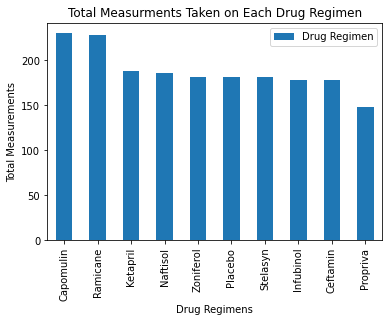

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = mouse_study["Drug Regimen"].value_counts()
measurementsbar = measurements.plot(kind="bar",title = "Total Measurments Taken on Each Drug Regimen", legend = True)
measurementsbar.set(xlabel="Drug Regimens", ylabel="Total Measurements")

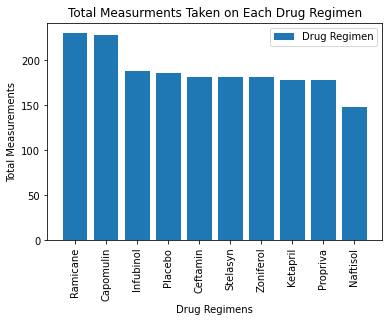

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimens = mouse_study["Drug Regimen"].unique()
regimen_list = regimens.tolist()
plt.bar(regimen_list,measurements, align = "center", label="Drug Regimen")
plt.title("Total Measurments Taken on Each Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Total Measurements")
plt.xticks(rotation = 90)
plt.legend()

Male      958
Female    922
Name: Sex, dtype: int64

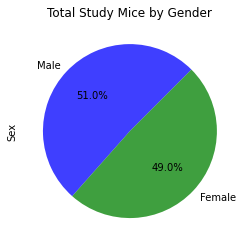

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# df.plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', 
#  startangle=90, shadow=False, labels=df['officer_name'], legend = False, fontsize=14)
labels = ["Female","Male"]

mouse_study["Sex"].value_counts().plot(kind='pie', autopct = "%1.1f%%", startangle = 45, colors = ["blue","green"],
                                       wedgeprops={'alpha':0.75}, title = "Total Study Mice by Gender")
mouse_study['Sex'].value_counts()

Text(0.5, 1.0, 'Total Study Mice by Gender')

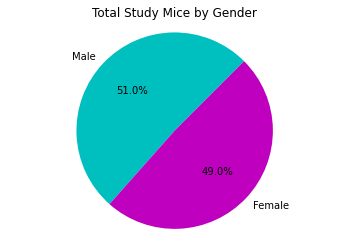

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
gender_split = mouse_study["Sex"].value_counts()
colors = ["c", "m"]
plt.pie(gender_split, labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 45)
plt.axis("equal")
plt.title("Total Study Mice by Gender")

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study.groupby("Mouse ID").max()["Timepoint"]
mouse_study["Timepoint"].count()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_study_vol = pd.merge(mouse_study, last_timepoint, on="Mouse ID", how="outer")
mouse_study_vol = mouse_study_vol.rename(columns = {"Timepoint_x":"Timepoint", "Timepoint_y":"Last Timepoint"})
mouse_study_vol.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
